# Read data from .txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [3]:
# set fixed size for plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [5]:
data = pd.read_csv('train2-2.txt',sep='|')
#test = pd.read_csv('test2-2.txt', sep='|')

Cod_Prod
502      3
504     69
703     67
803      9
804     21
1004    37
1008    20
1014    17
1015    28
1305    18
1308     5
1312     1
2104    19
2502    24
2801    34
2901     6
Name: ID_Customer, dtype: int64

# Information about data
## Variables
    ID_Customer: Identificador de cliente.
    Cod_Prod: Código de la modalidad de producto contratado.
    Cod_Fecha: Fecha de contratación de la modalidad de producto.
    Socio_Demo_01-05: Variables socio demográficas relacionadas con el cliente.
    

#### 1. Socio_Demo_01.

    1: Edad < 18 años
    2: Edad >= 18 años y Edad < 30 años
    3: Edad >= 30 años y Edad < 45 años
    4: Edad >= 45 años y Edad < 65 años
    5: Edad >= 65 años
        

#### 2. Socio_Demo_02.
    1: Antigüedad < 1 año
    2: Antigüedad >=1 año y Antigüedad < 5 años
    3: Antigüedad >= 5 años y Antigüedad < 10 años
    4: Antigüedad >= 10 años y Antigüedad < 20 años
    5: Antigüedad >= 20 años

#### 3. Socio_Demo_03.
    1: Ingresos < 6.000 €
    2: Ingresos >= 6.000 € and Ingresos < 12.000 €
    3: Ingresos >= 12.000 € and Ingresos < 24.000 €
    4: Ingresos >= 24.000 € and Ingresos < 32.000 €
    5: Ingresos >= 32.000 €

#### 4. Cod_Prod.: Código de la modalidad de producto contratado.
#### 5. Socio_Demo_04: Sexo (1: Hombre, 2: Mujer)
#### 6. Socio_Demo_05: Segmento (00: Particular | 01:Agricultor | 02:Comercio | 03:Autónomo)
#### 7. Cod_Fecha: Formato YYYY-MM

# Important phrases about data
    1. Train size > 3 million rows. Test size > 1 million rows.
    2. The clients in both files are different. Train > 1/2 million clients. Test > 1/4 million clients.
    3. There are almost 16% and 11% of clients with only one product in test and train, respectively.
    4. There are the same products in both files.
    5. Products are never repeated.
    6. Socio_Democrotic Values ARE ALWAYS CONSTANT on the user. Meaning they correspond to the time being (2017) and not when the prodcut was bought.

### Unique customers IDs for data and test

In [ ]:
sortedData = data.ID_Customer.unique()
sortedData.sort()
sortedData[-10:]

In [ ]:
sortedTest = test.ID_Customer.unique()
sortedTest.sort()
sortedTest[:10]

In [ ]:
data[data.ID_Customer=='A0451704']

In [ ]:
test[test.ID_Customer=='B0676372']

In [ ]:
test[test.ID_Customer=='B0676373']

## How many clients have only one product purchased?

### In test

In [ ]:
oneProdTest = test.groupby('ID_Customer')['Cod_Prod'].count()
print oneProdTest[oneProdTest==1].size, oneProdTest[oneProdTest==1].size/float(test.ID_Customer.unique().size)*100, '%'

### In train

In [ ]:
oneProdData = data.groupby('ID_Customer')['Cod_Prod'].count()
print oneProdData[oneProdData==1].size, oneProdData[oneProdData==1].size/float(data.ID_Customer.unique().size)*100, '%'

## Size of dataset

In [ ]:
data.shape

In [ ]:
test.shape

In [ ]:
#Number of clients
data.ID_Customer.unique().size

In [ ]:
test.ID_Customer.unique().size

### Number of products

In [ ]:
data.Cod_Prod.unique().size

In [4]:
test.Cod_Prod.unique().size

NameError: name 'test' is not defined

#### There the same amount of prodcuts! Are they the same products?

In [5]:
for product in test.Cod_Prod.unique():
    if product not in data.Cod_Prod.unique():
        print 'New product: ', product

NameError: name 'test' is not defined

#### Is there all type of features?

In [7]:
print data.Socio_Demo_01.unique()
print data.Socio_Demo_02.unique()
print data.Socio_Demo_03.unique()
print data.Socio_Demo_04.unique()
print data.Socio_Demo_05.unique()

[5 3 4 2 1]
[4 5 3 1 2]
[3 1 5 2 4]
[1 2]
[0 3 1 2]


YES!

# Missing values?

In [8]:
#Check if there is any NaN value in data
data.isnull().values.any()

False

In [9]:
test.isnull().values.any()

NameError: name 'test' is not defined

#### The dataset is clean!

## Let's se how well these products sell

Esto puede ir después de las grafiques que vaig fer el primer dia qeu visualitzven tant per cent de poblacio en cada socio_demo feature que havia comprat determinal producte


In [15]:
Sells_per_product = data.groupby('Cod_Prod').ID_Customer.count()

Sells_per_product[Sells_per_product < 100]

Cod_Prod
502      3
504     69
703     67
803      9
804     21
1004    37
1008    20
1014    17
1015    28
1305    18
1308     5
1312     1
2104    19
2502    24
2801    34
2901     6
Name: ID_Customer, dtype: int64

There are some products that are barerly purchased, lets explore more.

In [28]:
producs_sub25 = Sells_per_product[ Sells_per_product < 25].index
print producs_sub25.shape
print Sells_per_product[ Sells_per_product < 25].sum()

(11,)
143


In [25]:
%%time
data_sub25 = data.query('Cod_Prod in @producs_sub25')

CPU times: user 52.5 ms, sys: 16 ms, total: 68.5 ms
Wall time: 66.2 ms


In [26]:
data_sub25.head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
1444,A0000277,2104,2005-11,4,5,1,2,3
10087,A0001699,1008,2004-04,4,5,5,1,3
31582,A0004925,1008,2005-11,3,5,3,1,3
79714,A0014483,2104,2004-05,5,5,1,2,0
79799,A0014508,1014,1999-05,5,5,3,2,0


In [23]:
users_sub_25=data_sub25.ID_Customer.unique()

In [36]:
print 'Number of users that bought sub25 products: ', users_sub_25.size
print 'Number of sells of sub25 products: ', Sells_per_product[ Sells_per_product < 25].sum()
print 'Number of sells of sub100 products: ', Sells_per_product[Sells_per_product < 100].sum()
print 'Number of sub25 products: ', Sells_per_product[Sells_per_product < 25].size
print 'Number of  sub100 producs: ' ,Sells_per_product[Sells_per_product < 100].size

Number of users that bought sub25 products:  141
Number of sells of sub25 products:  143
Number of sells of sub100 products:  378
Number of sub25 products:  11
Number of  sub100 producs:  16


Vemos que hay 16 productos muy raros (comprados menos de 100 veces cada uno).

In [51]:
np.arange(prods.size)*2

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186])

In [70]:
Sells_per_product.describe()

count        94.000000
mean      35644.691489
std       96394.340067
min           1.000000
25%         364.250000
50%        3205.500000
75%       15433.500000
max      661756.000000
Name: ID_Customer, dtype: float64

We see that the Q4 of producs has unders 365 per product, a ridiculous ammount if we compare them to the top seller or the top 75%. Maybe we should drop them since they are not going perceptibly affect accuracy

Mean lenght:  35644.6914894 Std:  95880.2332542


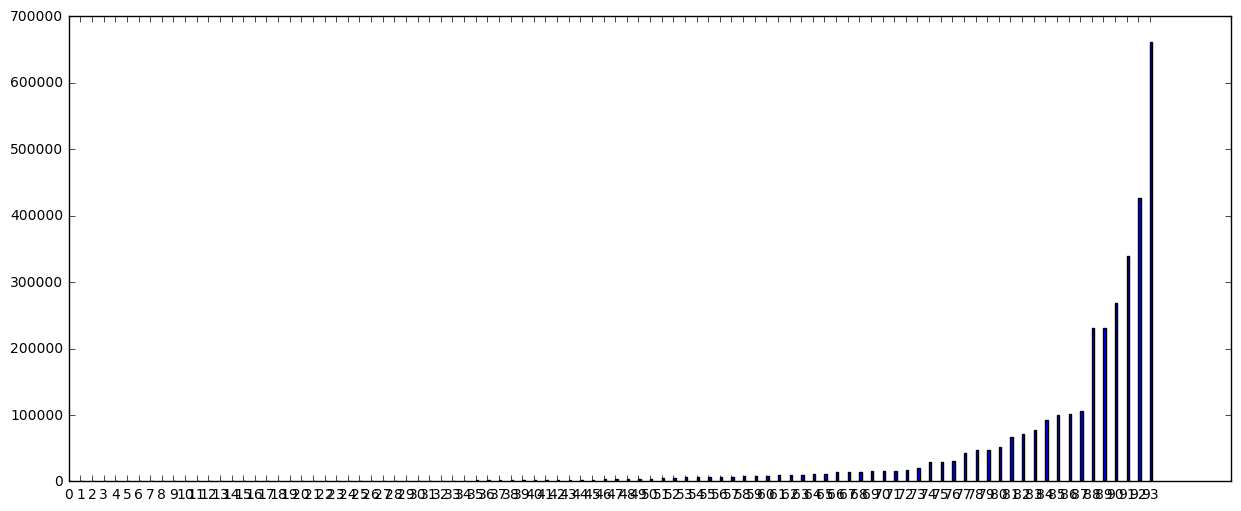

In [58]:

#Sumarize product sells
#Sumarize sequence lenght
Sells_per_product.sort_values()
sells=Sells_per_product.values
prods=Sells_per_product.index
print 'Mean lenght: ', np.mean(sells), 'Std: ', np.std(sells) 'median: '
sells= sorted(sells)
plt.bar(np.arange(prods.size)*4,sells, tick_label = range(prods.size))
plt.show()

In [69]:
Sells_per_product.describe()

count        94.000000
mean      35644.691489
std       96394.340067
min           1.000000
25%         364.250000
50%        3205.500000
75%       15433.500000
max      661756.000000
Name: ID_Customer, dtype: float64

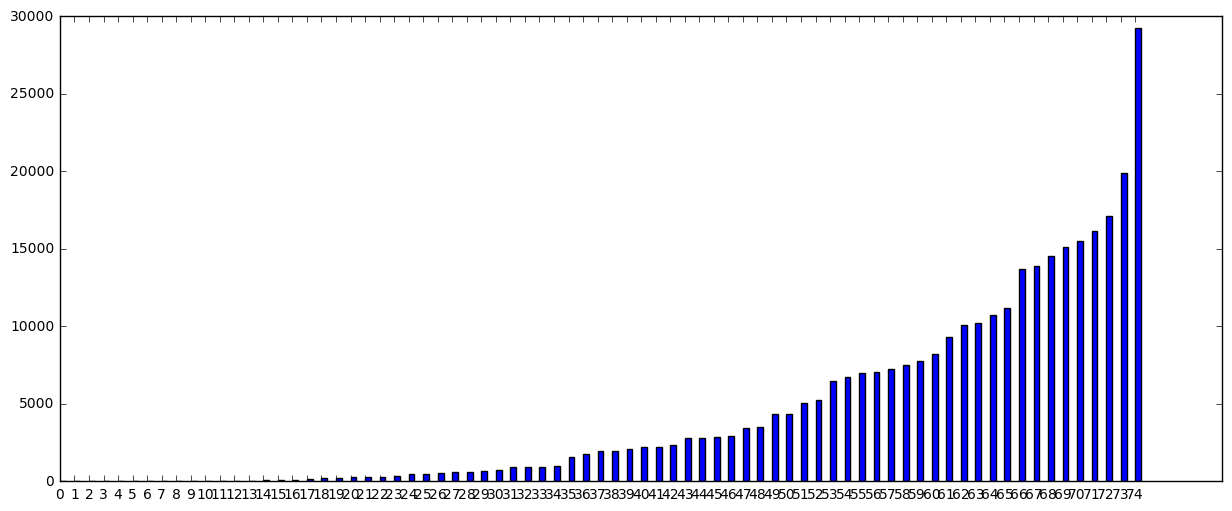

In [61]:
left=np.arange(prods.size)*2
labels= range(prods.size)
plt.bar(left[:75],sells[:75], tick_label = labels[:75])
plt.show()

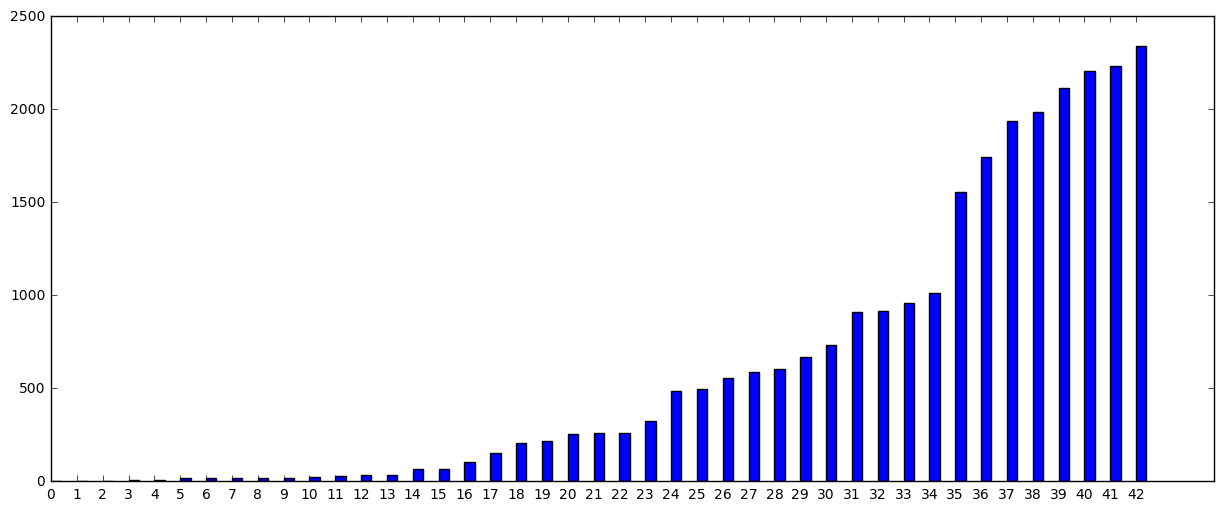

In [62]:
plt.bar(left[:43],sells[:43], tick_label = labels[:43])
plt.show()

In [68]:
median=np.median(sells)

sells[sells < median]

TypeError: only integer scalar arrays can be converted to a scalar index

# Counting purchased products by different features

In [10]:
productsPerAge = data.groupby('Socio_Demo_01')['Cod_Prod'].count()
productsPerAntiq = data.groupby('Socio_Demo_02')['Cod_Prod'].count()
productsPerIncome = data.groupby('Socio_Demo_03')['Cod_Prod'].count()
productsPerGender = data.groupby('Socio_Demo_04')['Cod_Prod'].count()

In [11]:
productsPerAge

Socio_Demo_01
1      47430
2     282960
3    1077626
4    1355148
5     587437
Name: Cod_Prod, dtype: int64

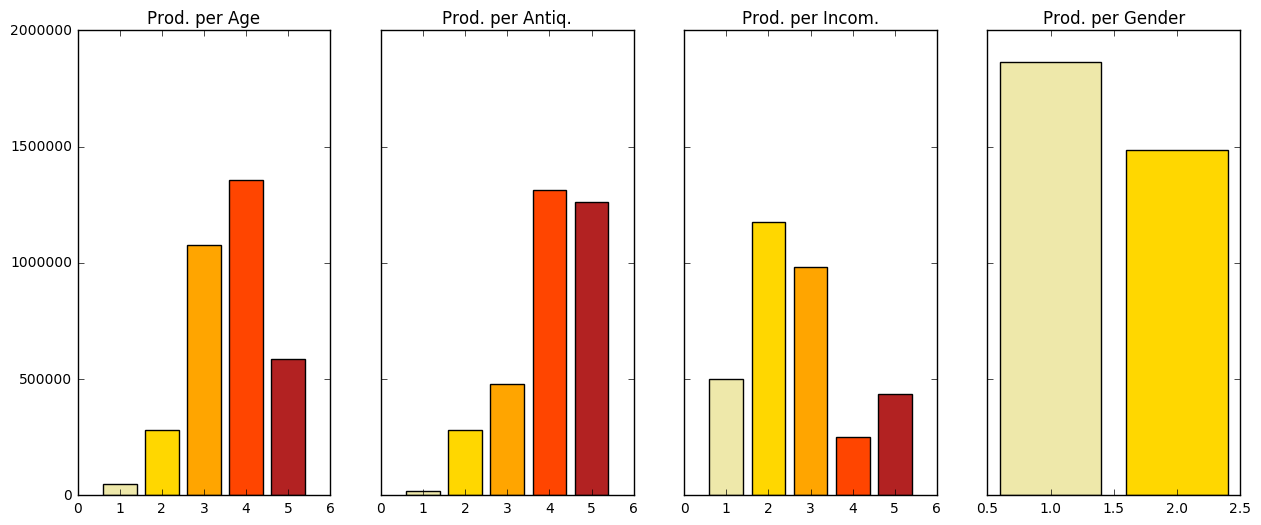

In [12]:
#Plottings
# Four subplots, sharing y axis
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
colors = ['#EEE8AA','#FFD700','#FFA500','#FF4500','#B22222']
ax1.bar(-0.4+productsPerAge.index.values,productsPerAge.values, color=colors)
ax2.bar(-0.4+productsPerAntiq.index.values,productsPerAntiq.values, color=colors)
ax3.bar(-0.4+productsPerIncome.index.values,productsPerIncome.values, color=colors)
ax4.bar(-0.4+productsPerGender.index.values,productsPerGender.values, color=colors)
ax1.set_title('Prod. per Age')
ax2.set_title('Prod. per Antiq.')
ax3.set_title('Prod. per Incom.')
ax4.set_title('Prod. per Gender')

In [13]:
data[data.Cod_Prod==301].head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
8,A0000002,301,1995-03,5,5,1,1,0
10,A0000003,301,2012-05,5,5,5,2,0
16,A0000004,301,2008-10,5,5,3,1,0
18,A0000005,301,1984-04,5,5,3,1,0
20,A0000006,301,1996-10,5,5,3,1,0


In [14]:
givenProdPerAge = data[data.Cod_Prod==301].groupby('Socio_Demo_01').count()

In [15]:
givenProdPerAge.Cod_Prod

Socio_Demo_01
1       504
2     27528
3    121398
4    171156
5    105583
Name: Cod_Prod, dtype: int64

# Important things about visualization

## Plot products as a function of month and year of purchase

In [16]:
prodVsPeriod = data.groupby(['Cod_Prod','Cod_Fecha'])['Cod_Prod'].count()

In [17]:
prodVsPeriod.head(10)

Cod_Prod  Cod_Fecha
101       1989-11      1
          1992-05      2
          1995-03      1
          1996-01      1
          1996-05      1
          1996-06      1
          1996-08      5
          1996-11      9
          1996-12      1
          1997-05      1
Name: Cod_Prod, dtype: int64

In [18]:
prodVsPeriod.index.levels[1].astype((lambda x: dt.datetime.strftime(x,'%Y-%m'))

SyntaxError: unexpected EOF while parsing (<ipython-input-18-0b6d71a55f44>, line 1)

## Array with clients and products

In [2]:
colnames = data.Cod_Prod.unique()
colnames.sort()
rownames = data.ID_Customer.unique()
rownames.sort()
idVSProd = pd.DataFrame(data=np.zeros((data.ID_Customer.unique().size,data.Cod_Prod.unique().size)),columns=colnames,index=rownames,dtype=int)

NameError: name 'data' is not defined

In [20]:
idVSProd.head()

,101,102,103,104,201,301,502,503,504,506,...,2706,2707,2801,2901,3001,3101,3401,9991,9992,9993
A0000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
idVSProd.loc[np.array(['A0451704','A0451708'])]

,101,102,103,104,201,301,502,503,504,506,...,2706,2707,2801,2901,3001,3101,3401,9991,9992,9993
A0451704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0451708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
groupedData = data.groupby(['ID_Customer','Cod_Prod'])['Cod_Prod'].count()

In [23]:
groupedTest = test.groupby(['ID_Customer','Cod_Prod'])['Cod_Prod'].count()

NameError: name 'test' is not defined

In [ ]:
groupedData[groupedData>1]

In [ ]:
groupedTest[groupedTest>1]

# ···  *The clients do not repeat a product ever!* ···

In [24]:
for product in colnames:
    columna = groupedData[:,product]
    idVSProd.loc[columna.index,product] = columna.values

In [8]:
idVSProd.head()

NameError: name 'idVSProd' is not defined

In [26]:
idVSProd.loc[idVSProd.loc[:,301].values > 0,301].head()

A0000002    1
A0000003    1
A0000004    1
A0000005    1
A0000006    1
Name: 301, dtype: int64

    Visualització, Producte vs Socio_demo

In [27]:
data.head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
0,A0000001,601,2007-05,5,4,3,1,0
1,A0000001,704,2013-04,5,4,3,1,0
2,A0000001,2501,2006-03,5,4,3,1,0
3,A0000001,2503,2006-03,5,4,3,1,0
4,A0000001,1011,2011-04,5,4,3,1,0


In [28]:
#Creem DF per cada producte. 
df601=df[df['Cod_Prod']==601]

NameError: name 'df' is not defined

In [ ]:
df601.head()

In [ ]:
df601.head() #Vemos que el producto se contrata mas de una vez en muchas ocasiones. Consideramos cada entrada como un 'cliente' distinto. La logica es que solo depende de las variables Socio_DEM, si cambiamos socio dem cambia la persona. 
print df601.size, df601['ID_Customer'].unique().size, 'ratio: ', df601['ID_Customer'].unique().size/float(df601.size)

In [ ]:

data.head()

In [ ]:
#Histogramas

#Numero de compras respecto a cada Socio_Demo.
Compras01=df601.groupby('Socio_Demo_01')['Cod_Prod'].count()
Compras02=df601.groupby('Socio_Demo_02')['Cod_Prod'].count()
Compras03=df601.groupby('Socio_Demo_03')['Cod_Prod'].count()
Compras04=df601.groupby('Socio_Demo_04')['Cod_Prod'].count()
Compras05=df601.groupby('Socio_Demo_05')['Cod_Prod'].count()

#Contamos numero de clientes en cada classe
Client_total_01=data.groupby('Socio_Demo_01').ID_Customer.count()
Client_total_02=data.groupby('Socio_Demo_02').ID_Customer.count()
Client_total_03=data.groupby('Socio_Demo_03').ID_Customer.count()
Client_total_04=data.groupby('Socio_Demo_04').ID_Customer.count()
Client_total_05=data.groupby('Socio_Demo_05').ID_Customer.count()

#Normalizamos.
Sells601=pd.DataFrame()
Sells601['Socio_Demo_01']=Compras01/Client_total_01
Sells601['Socio_Demo_02']=Compras02/Client_total_02
Sells601['Socio_Demo_03']=Compras03/Client_total_03
Sells601['Socio_Demo_04']=Compras04/Client_total_04
dummy=Compras05/Client_total_05
dummy.index=np.arange(4)+1 #Hay que cambiar los indices para que cuadre. Socio_Dem_04 las classes son 0,1,2,3
Sells601['Socio_Demo_05']=dummy

#Plottings
# Four subplots, sharing y axis
f, (bx1, bx2, bx3, bx4, bx5) = plt.subplots(1, 5, sharey=True)
colors = ['#EEE8AA','#FFD700','#FFA500','#FF4500','#B22222']
bx1.bar(Sells601.index.values, Sells601.Socio_Demo_01, color=colors)
bx2.bar(Sells601.index.values, Sells601.Socio_Demo_02, color=colors)
bx3.bar(Sells601.index.values, Sells601.Socio_Demo_03, color=colors)
bx4.bar([1,2], Sells601.Socio_Demo_04[:2], color=colors)
bx5.bar([1,2,3,4], Sells601.Socio_Demo_05[:4], color=colors)
bx1.set_title('Prod. per Age')
bx2.set_title('Prod. per Antiq.')
bx3.set_title('Prod. per Incom.')
bx4.set_title('Prod. per Gender')
bx5.set_tittle('Prod. per Segment')

In [29]:
data.head()
df=data[data.Cod_Prod == 601]
df.head()


,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
0,A0000001,601,2007-05,5,4,3,1,0
5,A0000002,601,1998-06,5,5,1,1,0
9,A0000003,601,1985-11,5,5,5,2,0
14,A0000004,601,2008-05,5,5,3,1,0
19,A0000005,601,1984-04,5,5,3,1,0


In [35]:
#Funcion 

def product_rel(data, Cprod):
    df=data[data.Cod_Prod == Cprod]
#Create dataframe for porduct
#Numero de compras respecto a cada Socio_Demo.
    Compras01=df.groupby('Socio_Demo_01')['Cod_Prod'].count()
    Compras02=df.groupby('Socio_Demo_02')['Cod_Prod'].count()
    Compras03=df.groupby('Socio_Demo_03')['Cod_Prod'].count()
    Compras04=df.groupby('Socio_Demo_04')['Cod_Prod'].count()
    Compras05=df.groupby('Socio_Demo_05')['Cod_Prod'].count()

#Contamos numero de clientes en cada classe
    Client_total_01=data.groupby('Socio_Demo_01').ID_Customer.count()
    Client_total_02=data.groupby('Socio_Demo_02').ID_Customer.count()
    Client_total_03=data.groupby('Socio_Demo_03').ID_Customer.count()
    Client_total_04=data.groupby('Socio_Demo_04').ID_Customer.count()
    Client_total_05=data.groupby('Socio_Demo_05').ID_Customer.count()

#Normalizamos.
    Sells=pd.DataFrame()
    
    Sells['Socio_Demo_01']=Compras01/Client_total_01
    Sells['Socio_Demo_02']=Compras02/Client_total_02
    Sells['Socio_Demo_03']=Compras03/Client_total_03
    Sells['Socio_Demo_04']=Compras04/Client_total_04
    dummy=Compras05/Client_total_05
    dummy.index=np.arange(4)+1 #Hay que cambiar los indices para que cuadre. Socio_Dem_04 las classes son 0,1,2,3
    Sells['Socio_Demo_05']=dummy





#Quitamos NaN values que aparecen por que todos los vectores de socio demo no son iguales. No se si hace falta
    #Sells.fillna(value=0, inplace='True')

    return Sells


In [42]:
df601=product_rel(data, 601)
df601.head()

,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
Socio_Demo_01,,,,,
1,0.750727,0.286428,0.255300,0.192925,0.212392
2,0.209164,0.245386,0.243225,0.203261,0.134665
3,0.160999,0.208886,0.159284,NaN,0.139344
4,0.173055,0.188423,0.128964,NaN,0.143341
5,0.270586,0.190737,0.134421,NaN,NaN


In [81]:

products=data.Cod_Prod.unique()
products

array([ 601,  704, 2501, 2503, 1011,  801, 9992,  301,  201, 2301, 2205,
       9993, 9991, 2302, 1001, 1020, 1401, 2602, 2704, 2707, 3401,  506,
       1013, 2202, 2705, 2601, 2701, 2702,  706, 2102, 1007, 1801, 1804,
        707, 3001, 1022, 2201, 2203, 1306,  102, 2401,  503, 1010, 1017,
       1309, 2204, 2105,  103, 2106, 2706, 1805, 1002, 1803, 1310, 1301,
       2103, 1004, 1009, 1802, 1019, 1012, 2104,  702, 2206,  708,  705,
       1307, 1302, 1311, 1005,  101, 1006, 1501, 1304, 2703, 1008, 3101,
       1015, 1303, 1014,  703, 1021,  804, 1305, 1806, 2502,  803, 1308,
       2901, 1312,  502, 2801,  104,  504])

In [95]:
products=data.Cod_Prod.unique()
a=pd.DataFrame(products, columns=['Cod_Prod']) 
a['Max']=np.arange(94)
a.head()

,Cod_Prod,Max
0,601,0
1,704,1
2,2501,2
3,2503,3
4,1011,4


In [118]:
df601.head()
print df601.Socio_Demo_01.loc[1]
df601.head()

0.750727387729


,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
Socio_Demo_01,,,,,
1,0.750727,0.286428,0.255300,0.192925,0.212392
2,0.209164,0.245386,0.243225,0.203261,0.134665
3,0.160999,0.208886,0.159284,NaN,0.139344
4,0.173055,0.188423,0.128964,NaN,0.143341
5,0.270586,0.190737,0.134421,NaN,NaN


In [136]:
%%time
#Sort de los productos ppor frequencia. PARA PODER VISUALIZARLOS BIEN 
products=data.Cod_Prod.unique()
j=0
a=pd.DataFrame(products, columns=['Cod_Prod'][:5]) #incializamos data frame
a['Max']=np.arange(94, dtype=float) 
for i in products:
    a.Max[j]=np.max(np.max(product_rel(data, i)))
    j=j+1


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CPU times: user 1min 15s, sys: 9.76 s, total: 1min 25s
Wall time: 1min 27s


In [134]:

a.sort(columns='Max', ascending=False, inplace=True)
a.tail()
products=a.Cod_Prod.values
print products
a.head()

[ 601  201  301 2302 9993 9991 9992  704 2301 2601 2205 2704 2401 1011 2701
 2503 2501  706 2602 2702 2705 2707 1009 2106  707  801 2201  503 2203 1001
 1020 1804 2102 1022 1801 1013 3401 2202 1309 1310 3001 1306 1002 2206  102
  708 1017 1802  702 1307 2204 1019 2706  103 1311 1401 1304 1012 1007 1301
 1805  506 1501 1302  705 2103 2105 3101 2703 1021 1303  101 1006 1010 1806
 1005 1803  104  504  804 1015 1008  703 2801 2502 1004 2104 1305 1014 2901
  803 1308  502 1312]


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Cod_Prod,Max
0,601,0.750727
8,201,0.186214
7,301,0.179735
13,2302,0.132869
11,9993,0.108595


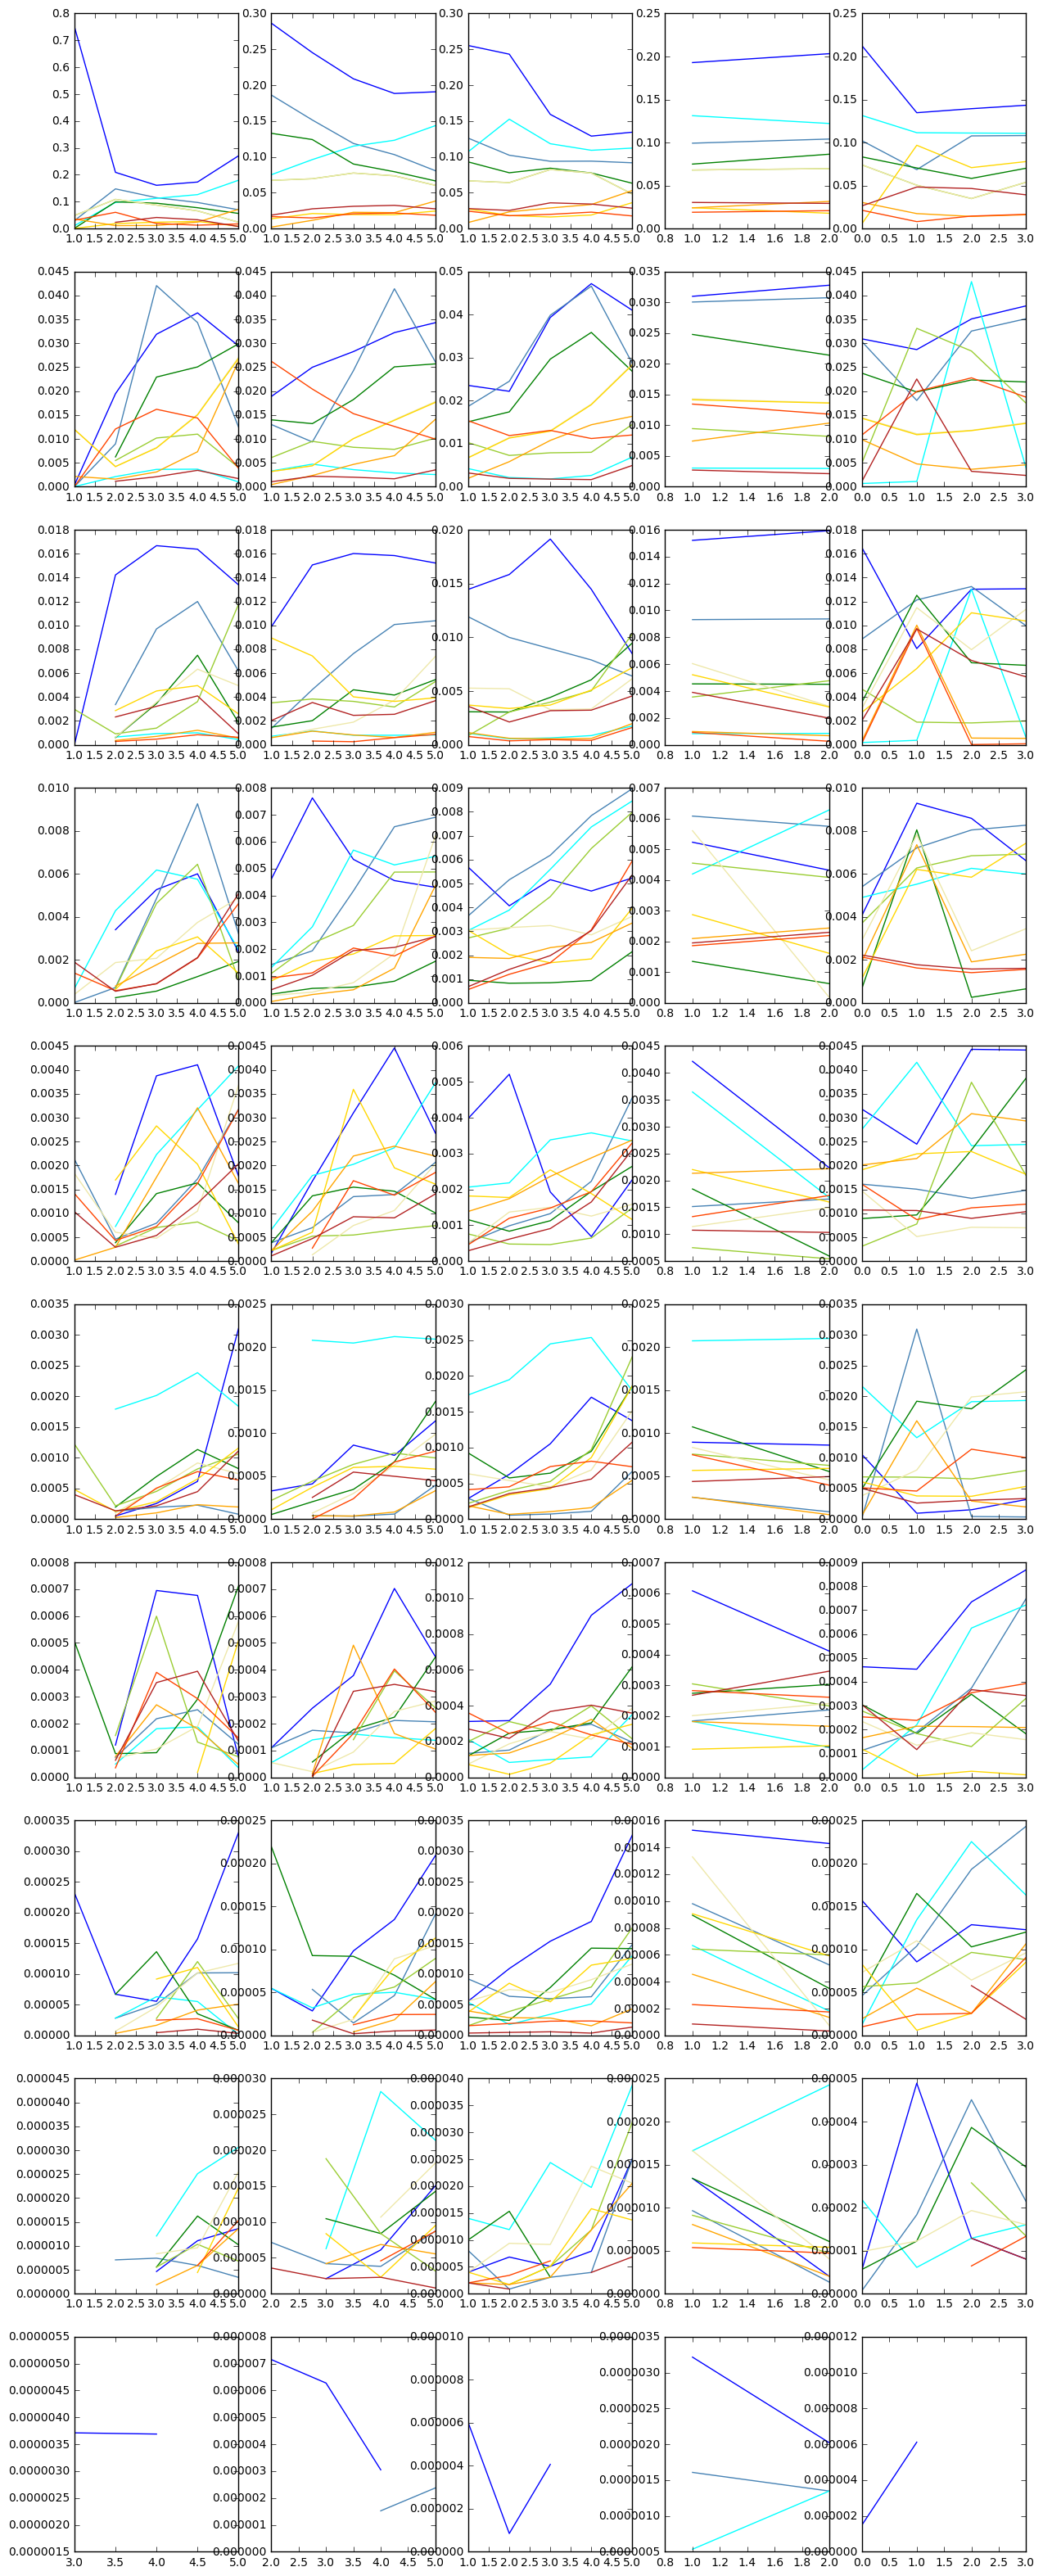

In [135]:
#Plots ##LO QUE TOCA
#Pequeño problema, si los productos 'raros' se comparan a productos mas frecuentes la visualizacion se vuelve mas dificil. 

rcParams['figure.figsize'] = 15, 40
rows=10
cols=5
f, ax2= plt.subplots(rows, cols, sharex=False, sharey=False)
colors = ['#0000FF','#4682B4','#00FFFF','#008000','#9ACD32','#EEE8AA','#FFD700','#FFA500','#FF4500','#B22222'] 

for i in range(0, products.size/10+1):
    for j in range(10):
        if 10*i+j < products.size: #Products definido en la celda de arriba
            product = products[10*i+j]
            df=product_rel(data, product)
            ax2[i,0].plot(df.index.values, df.Socio_Demo_01, color=colors[j], label=str(product))
            ax2[i,1].plot(df.index.values, df.Socio_Demo_02, color=colors[j], label=str(product))
            ax2[i,2].plot(df.index.values, df.Socio_Demo_03, color=colors[j], label=str(product))
            ax2[i,3].plot([1,2], df.Socio_Demo_04[:2], color=colors[j], label=str(product))
            ax2[i,4].plot(range(4), df.Socio_Demo_05[:4], color=colors[j], label=str(product))
    #leyenda for k in range(5):
        #handles, labels = ax2[i,k].get_legend_handles_labels()
        #ax2[i,k].legend(handles,labels,loc='upper left')

In [12]:
import pandas as pd
import numpy as np
data= pd.Series(np.random.randn(10), index =[['a','a','a','b','b','b','c','c','d','d'],[1,2,3,1,2,3,1,2,2,3]])

In [13]:
data

a  1   -1.079086
   2    0.017873
   3    0.528414
b  1    1.462864
   2    0.314324
   3    1.194004
c  1   -0.723474
   2    2.431482
d  2    1.646265
   3    0.112295
dtype: float64

1    0.212392
2    0.134665
3    0.139344
4    0.143341
dtype: float64